In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Depressão e Ansiedade

 Neste projeto, tentaremos partir das respostas das 42 perguntas de um questionário realizado com base no Taylor Manifest Anxiety Scape (TMAS), estas que estão armazenadas nas colunas Q e serão explicadas mais a frente, tentaremos prever a probabilidade de uma pessoa se identificar (e o grau com que se identifica) como "ansiosa e facilmente desanimada", onde nossa variável target é o valor atribuído ao TIPI 4 do resultado desse teste. O teste utilizado como base para esse modelo está disponível em https://openpsychometrics.org/tests/TMAS/.

Para isso foi selecionado no Kaggle um datset no qual foram armazenadas as respostas as perguntas feitas aos usuário, assim como outras informações sobre eles, este que está disponível no link: https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales. 

Para que seja possível entender o significado de suas colunas, foi disponibilizado no proprio Kaggle uma descrição completa sobre o dataset, este que está transcrito abaixo:

### É importante ressaltar que como visto acima, apesar das respostas serem dadas em números estas ainda apresentam um estado qualitativo, portanto as analises do projeto serão realizadas tendo como base valores qualitativos que representam cada uma das respostas possíveis a cada uma das perguntas.

# Inserção do dataset, considerações inciais e limpezas

Na célula abaixo, definimos a variável data, a qual corresponde ao dataset criado com os resultados das perguntas do teste feitas a usuários.

In [19]:
raw_data = pd.read_csv("data.csv",sep='\t')
raw_data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


Para esse projeto foram consideradas desnecessárias as colunas QI e QE, uma vez que estas armazenam o número da questão e o tempo de resposta, estes que não forneceram a principio informações de relevância para análise e por isso forma removidas através do códico da célula abaixo.

Com o objetivo de se ter maior confiabilidade dos dados, també foram foram filtradas respostas as quais partiam de um mesmo indeço IP, oque poderia indicar que a mesma pessoa poderia ter respondido dos vezes.

In [20]:
tipis_l = [f'TIPI{i+1}' for i in range(10)]
q_l = [f'Q{i+1}A' for i in range(42)]

f_data = raw_data.loc[(raw_data.VCL6 == 0) & (raw_data.VCL9 == 0) & (raw_data.VCL12==0) & (raw_data.uniquenetworklocation==1),raw_data.columns.isin(tipis_l+q_l)]

for tipi in tipis_l:
    f_data = f_data.loc[~(f_data[tipi]==0),:]

In [21]:
tipis_l = [f'TIPI{i+1}' for i in range(10)]

for tipi in tipis_l:
    f_data = f_data.loc[~(f_data[tipi]==0),:]
    
f_data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,4,4,2,4,4,4,4,4,2,1,...,1,5,7,7,7,7,7,5,1,1
1,4,1,2,3,4,4,3,4,3,2,...,6,5,4,7,5,4,7,7,1,5
2,3,1,4,1,4,3,1,3,2,4,...,2,5,2,2,5,6,5,5,3,2
3,2,3,2,1,3,3,4,2,3,3,...,1,1,7,4,6,4,6,1,6,1
5,1,1,2,1,3,1,1,3,3,2,...,2,1,6,1,7,7,7,2,6,7


Na célula abaixo, com objetivo de melhor visualização forma alterados os valores numericos das repostas dos TIPI e das perguntas, para a qualidade a que se referem, estas que foram especificadas mais acima.

In [22]:
data = f_data.copy() 
tipi_cat = {
    1 : "Disagree strongly",
    2 : "Disagree moderately",
    3 : "Disagree a little",
    4 : "Neither agree nor disagree",
    5 : "Agree a little",
    6 : "Agree moderately",
    7 : "Agree strongly"
}
q_cat = {
    1 : "Did not apply to me at all",
    2 : "Applied to me to some degree, or some of the time",
    3 : "Applied to me to a considerable degree, or a good part of the time",
    4 : "Applied to me very much, or most of the time",
}
for col in data.columns:
    if not col.startswith('Q'):
        data[col] = data[col].apply(lambda x: tipi_cat[x])
        continue
    data[col] = data[col].apply(lambda x: q_cat[x])

### Abaixo foi iniciada uma analise visual dos dados coletados.

##### Para a primeira analise foi plotado um histograma correspondente ao TIPI4 e suas respostas

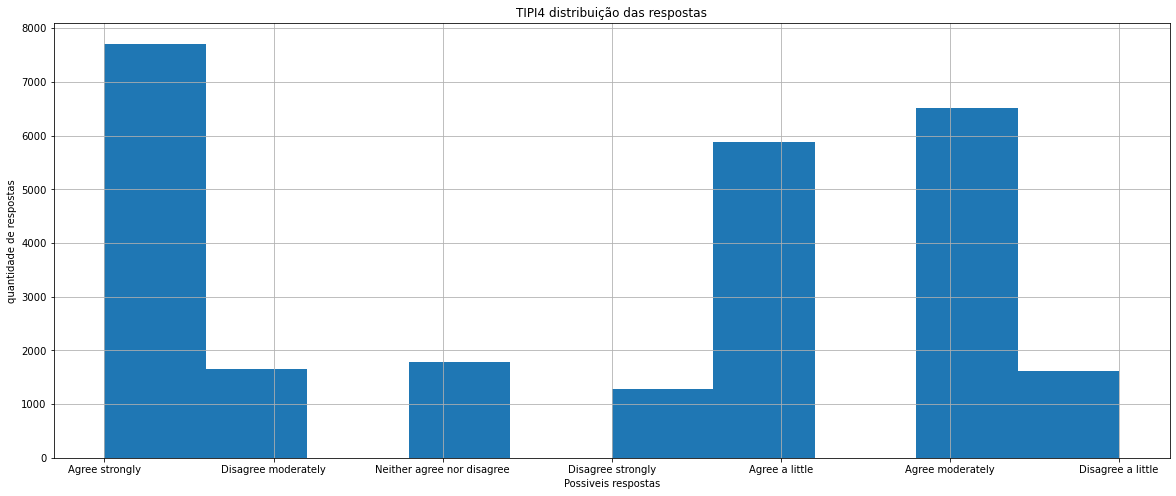

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(20,8))
plt.title('TIPI4 distribuição das respostas')
plt.xlabel('Possiveis respostas')
plt.ylabel('quantidade de respostas')
data.TIPI4.hist()
plt.show()
plt.savefig('graf1.png')

##### Para a primeira analise foi plotado um histograma correspondente as perguntas Q e suas respostas

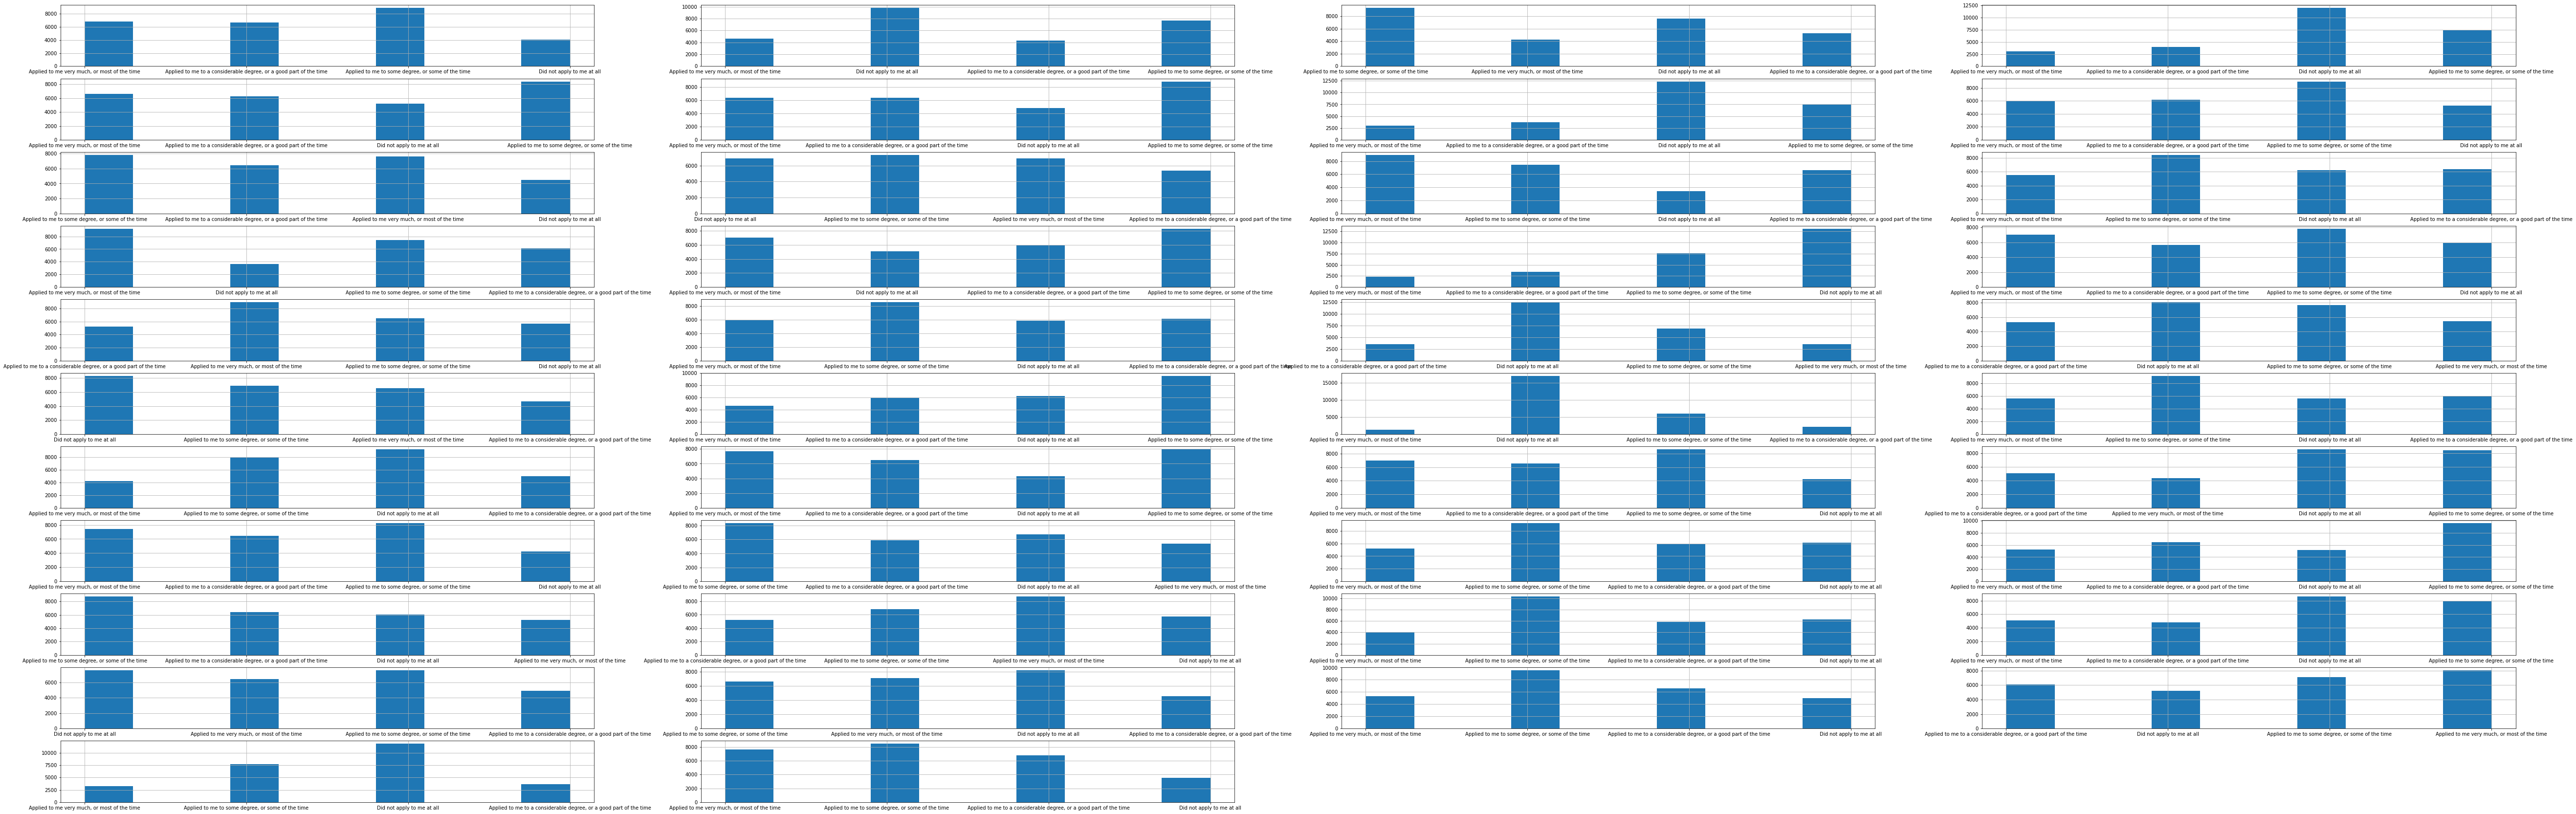

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(90,30))
for i,q in enumerate(q_l):
    plt.subplot(11,4,i+1)
    data[q].hist()
plt.show()
plt.savefig('graf2.png')

Através do plot realizado acima, é possivel perceber que as respostas tendem a não ser extremamente divididas, apresentando quantidades semelhantes de respostas para cada possibilidade.

##### Para a primeira analise foi plotado um histograma correspondente aos TIPI e suas respostas

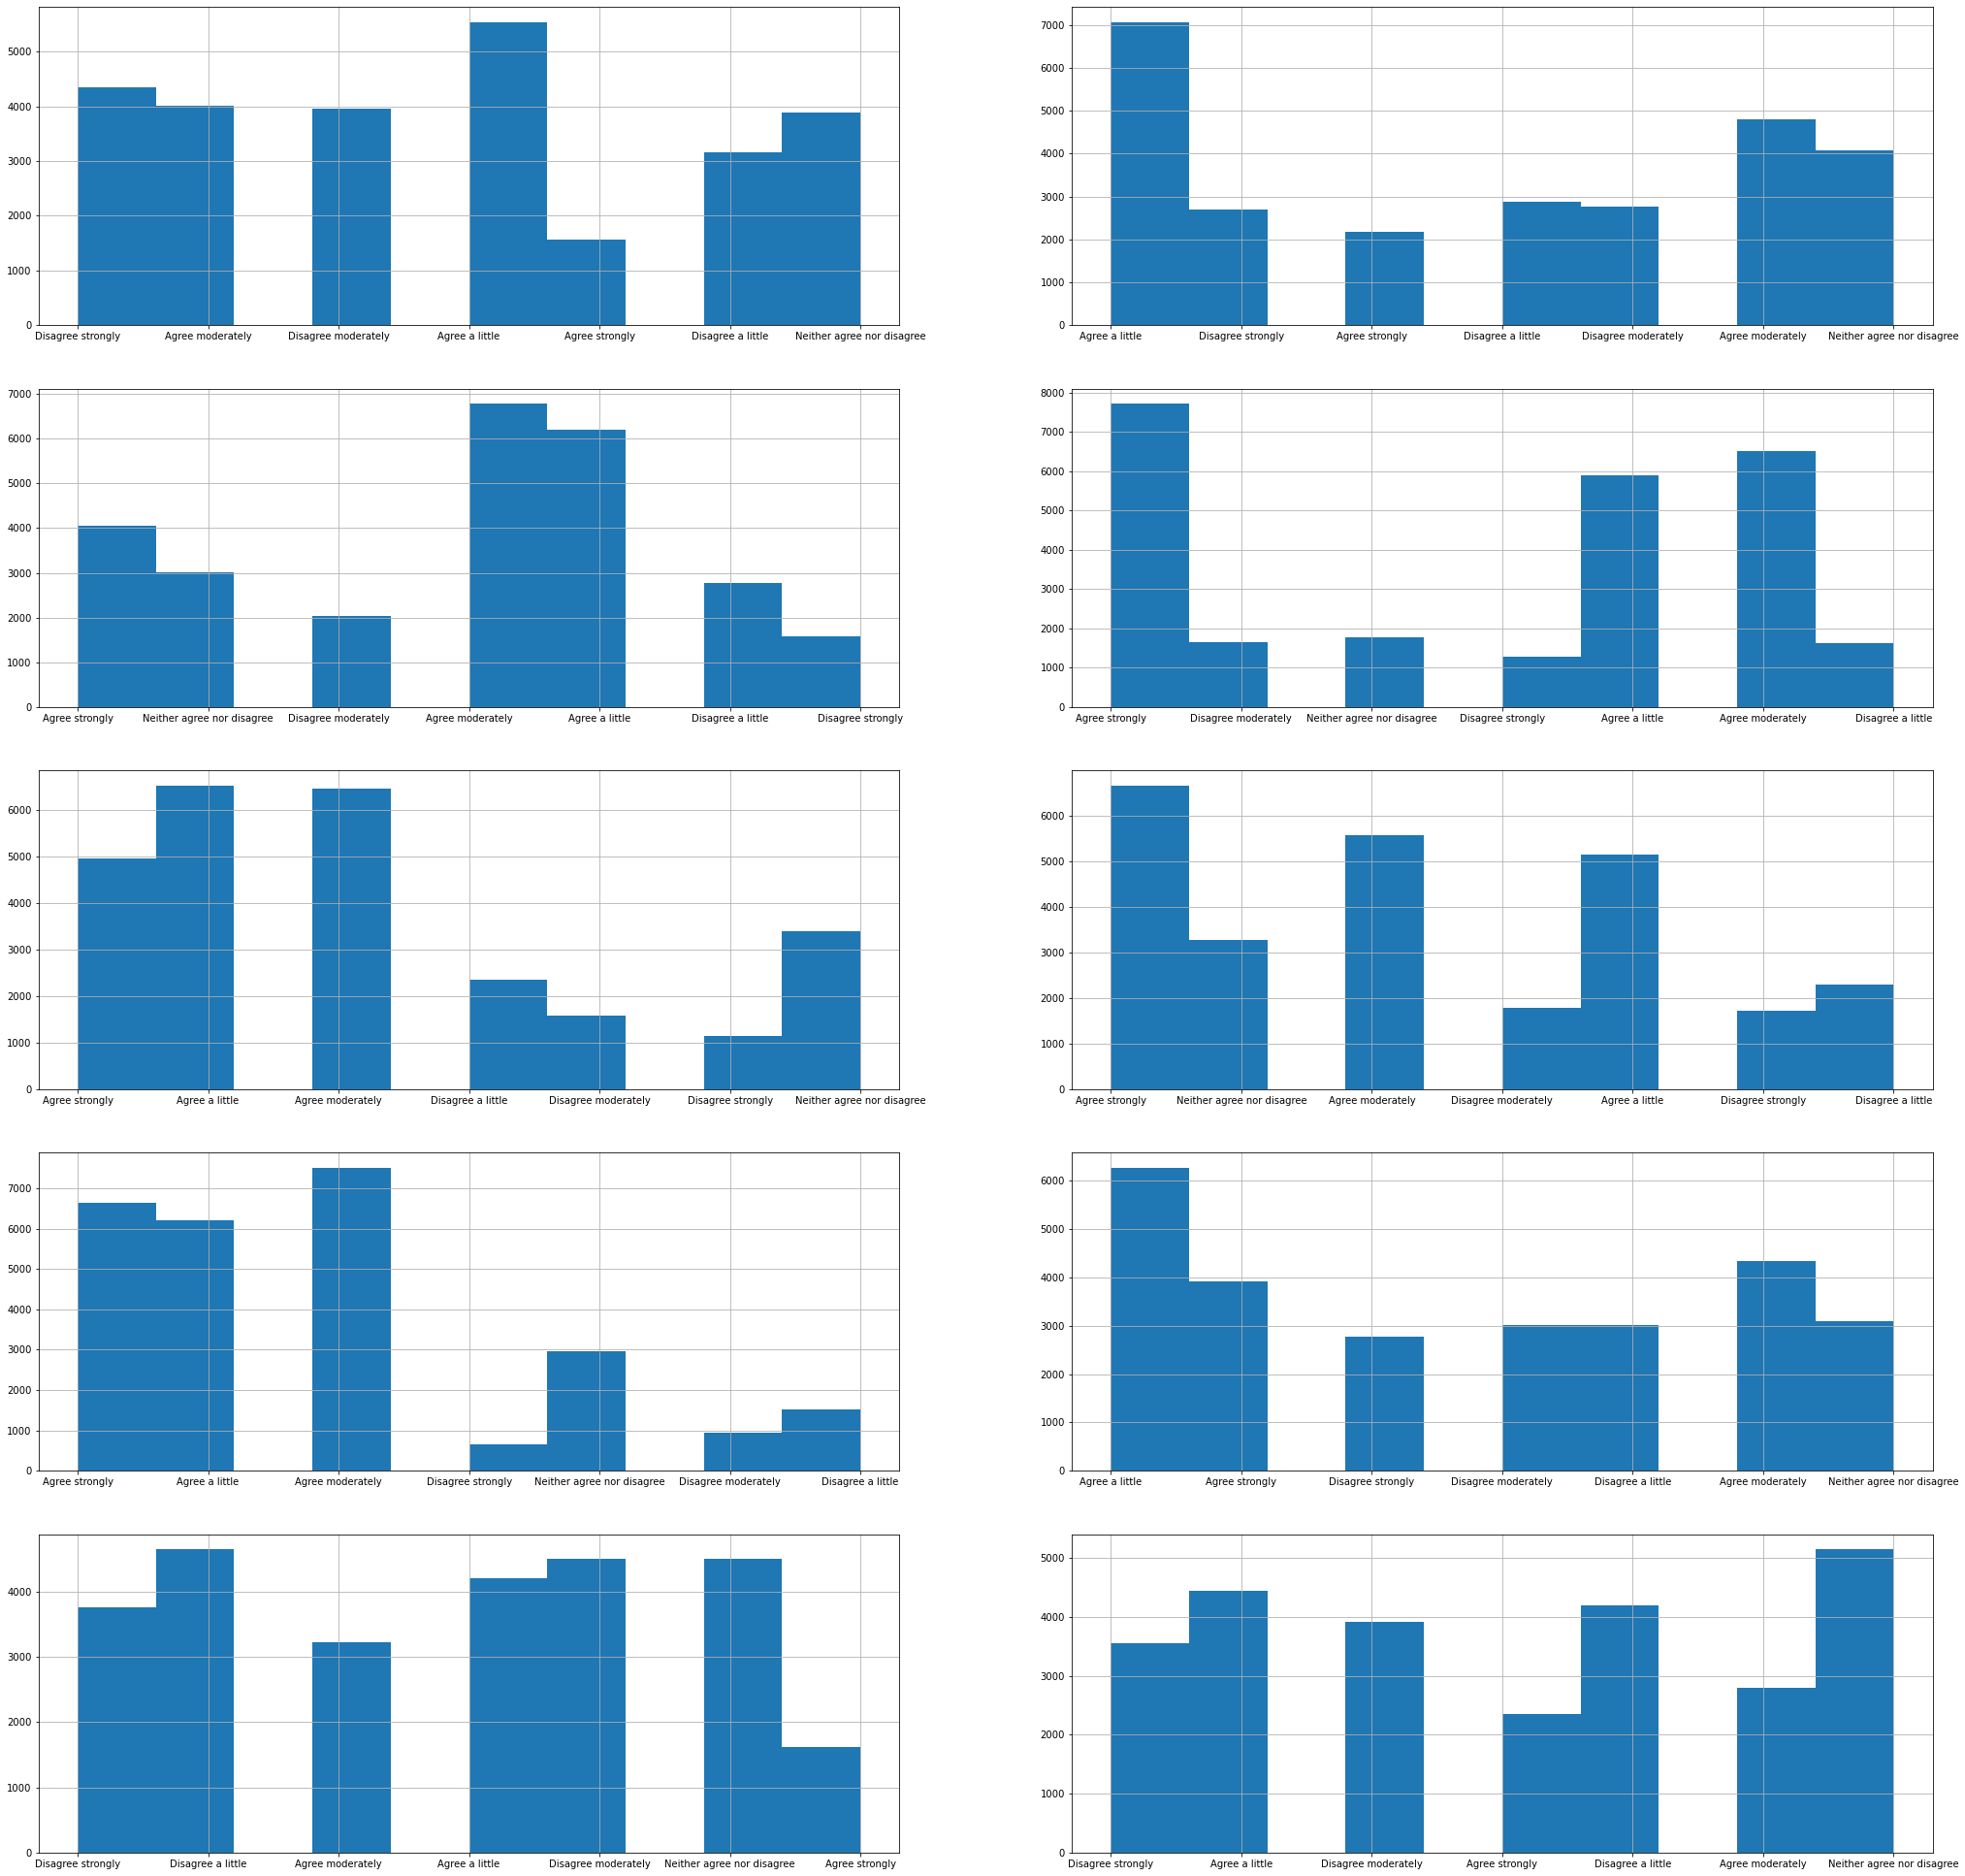

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(35,35))
for i,tipi in enumerate(tipis_l):
    plt.subplot(5,2,i+1)
    data[tipi].hist()
plt.show()
plt.savefig('graf3.png')

Através do gráfico acima foi possível perceber que ao longo dos TIPI é mais provável que a distribuição das respostas esteja mais divida entre as possíveis respostas, não apresentando evidencias de alta concentração em certos valores de resposta.

##### Abaixo foi traçado um Spider Graph das repostas de autoidentificação das pessoas quanto aos TIPIs, de maneira a estimar como poderíamos esperar que nosso algoritmo responda.

##### Usando os 3 quartis dos nossos dados, em azul há o quartil inferior, em laranja há a média, e em rosa há o quartil superior dos dados.

In [26]:
categories = ['Extraverted, enthusiastic','Critical, quarrelsome','Dependable, self-disciplined', 'Anxious, easily upset', 'Open to new experiences, complex', 'Reserved, quiet', 'Sympathetic, warm',
              'Disorganized, careless', 'Calm, emotionally stable', 'Conventional, uncreative']

q1 = [np.quantile(f_data.TIPI1, .25), np.quantile(f_data.TIPI2, .25), np.quantile(f_data.TIPI3, .25), np.quantile(f_data.TIPI4, .25), np.quantile(f_data.TIPI5, .25), np.quantile(f_data.TIPI6, .25),
      np.quantile(f_data.TIPI7, .25), np.quantile(f_data.TIPI8, .25), np.quantile(f_data.TIPI9, .25), np.quantile(f_data.TIPI10, .25)]

q2 = [np.quantile(f_data.TIPI1, .5), np.quantile(f_data.TIPI2, .5), np.quantile(f_data.TIPI3, .5), np.quantile(f_data.TIPI4, .5), np.quantile(f_data.TIPI5, .5), np.quantile(f_data.TIPI6, .5), 
      np.quantile(f_data.TIPI7, .5), np.quantile(f_data.TIPI8, .5), np.quantile(f_data.TIPI9, .5), np.quantile(f_data.TIPI10, .5)]

q3 = [np.quantile(f_data.TIPI1, .75), np.quantile(f_data.TIPI2, .75), np.quantile(f_data.TIPI3, .75), np.quantile(f_data.TIPI4, .75), np.quantile(f_data.TIPI5, .75), np.quantile(f_data.TIPI6, .75),
      np.quantile(f_data.TIPI7, .75), np.quantile(f_data.TIPI8, .75), np.quantile(f_data.TIPI9, .75), np.quantile(f_data.TIPI10, .75)]

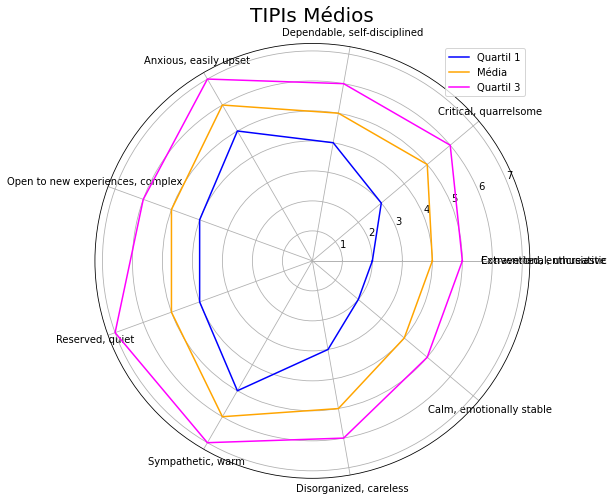

<Figure size 432x288 with 0 Axes>

In [27]:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=10)

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
#for d in range(len(f_data)):
#    plt.plot(label_loc, [f_data[f'TIPI{i+1}'] for i in range(10)], label='', alpha=0.0003, color='magenta')
#    '''caso a gente tivesse um pc muito louco e quisesse plottar todos os resultados'''

plt.plot(label_loc, q1, label='Quartil 1', alpha=1, color='blue')
plt.plot(label_loc, q2, label='Média', alpha=1, color='orange')
plt.plot(label_loc, q3, label='Quartil 3', alpha=1, color='magenta')

plt.title('TIPIs Médios', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()

plt.show()
plt.savefig('spider.png')

A partir do gráfico, podemos concluir então que a maioria dos TIPIs têm um índice médio de resposta entre 4 e 5, o que indica que os participantes ou não identificam tal característica nas suas personalidades ou concordam parcialmente. As exceções são os TIPI4 e TIPI7, que ambos têm média 6. Esperamos obter ao final resultados que condizam com esse resultado, especialmente do TIPI4. 